In [1]:
import pandas
import numpy as np

files = ["../input/ap_2010.csv", "../input/class_size.csv", "../input/demographics.csv", "../input/graduation.csv", "../input/hs_directory.csv", "../input/math_test_results.csv", "../input/sat_results.csv"]

data = {}
for f in files:
    d = pandas.read_csv("{0}".format(f))
    data[f.replace(".csv", "")] = d

In [2]:
for k,v in data.items():
    print("\n" + k + "\n")
    print(v.head())


../input/ap_2010

      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  

../input/class_size

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Rober

In [3]:
data["../input/demographics"]["DBN"].head()

0    01M015
1    01M015
2    01M015
3    01M015
4    01M015
Name: DBN, dtype: object

In [4]:
data["../input/class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15,1.0,15.0,15.0,15.0,ATS,NaN


In [5]:
data["../input/class_size"]["DBN"] = data["../input/class_size"].apply(lambda x: "{0:02d}{1}".format(x["CSD"], x["SCHOOL CODE"]), axis=1)
data["../input/hs_directory"]["DBN"] = data["../input/hs_directory"]["dbn"]

In [6]:
survey1 = pandas.read_csv("../input/survey_all.txt", delimiter="\t", encoding='windows-1252')
survey2 = pandas.read_csv("../input/survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey1["d75"] = False
survey2["d75"] = True
survey = pandas.concat([survey1, survey2], axis=0)

In [7]:
survey.head()

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


In [8]:
survey["DBN"] = survey["dbn"]
survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_10", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11",]
survey = survey.loc[:,survey_fields]
data["survey"] = survey
survey.shape

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


(1702, 23)

In [9]:
data["../input/class_size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17,1.0,17.0,17.0,17.0,ATS,NaN,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17,1.0,17.0,17.0,17.0,ATS,NaN,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15,1.0,15.0,15.0,15.0,ATS,NaN,01M015


In [10]:
data["../input/sat_results"].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [11]:
class_size = data["../input/class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]
class_size = class_size.groupby("DBN").agg(np.mean)
class_size.reset_index(inplace=True)
data["../input/class_size"] = class_size

In [12]:
demographics = data["../input/demographics"]
demographics = demographics[demographics["schoolyear"] == 20112012]
data["../input/demographics"] = demographics

In [13]:
data["../input/math_test_results"] = data["../input/math_test_results"][data["../input/math_test_results"]["Year"] == 2011]
data["../input/math_test_results"] = data["../input/math_test_results"][data["../input/math_test_results"]["Grade"] == '8']

In [14]:
data["../input/graduation"] = data["../input/graduation"][data["../input/graduation"]["Cohort"] == "2006"]
data["../input/graduation"] = data["../input/graduation"][data["../input/graduation"]["Demographic"] == "Total Cohort"]

In [15]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["../input/sat_results"][c] = data["../input/sat_results"][c].convert_objects(convert_numeric=True)

data['../input/sat_results']['sat_score'] = data['../input/sat_results'][cols[0]] + data['../input/sat_results'][cols[1]] + data['../input/sat_results'][cols[2]]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
data["../input/hs_directory"]['lat'] = data["../input/hs_directory"]['Location 1'].apply(lambda x: x.split("\n")[-1].replace("(", "").replace(")", "").split(", ")[0])
data["../input/hs_directory"]['lon'] = data["../input/hs_directory"]['Location 1'].apply(lambda x: x.split("\n")[-1].replace("(", "").replace(")", "").split(", ")[1])

for c in ['lat', 'lon']:
    data["../input/hs_directory"][c] = data["../input/hs_directory"][c].convert_objects(convert_numeric=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


In [17]:
for k,v in data.items():
    print(k)
    print(v.head())

../input/ap_2010
      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  
../input/class_size
      DBN  CSD  NUMBER OF SECTIONS  AVERAGE CLASS SIZE  \
0  01M292    1            4.000000           22.564286   
1  01M332    1            2.000000           22.000000   
2  01M378    1            

In [18]:
flat_data_names = [k for k,v in data.items()]
flat_data = [data[k] for k in flat_data_names]
full = flat_data[0]
for i, f in enumerate(flat_data[1:]):
    name = flat_data_names[i+1]
    print(name)
    print(len(f["DBN"]) - len(f["DBN"].unique()))
    join_type = "inner"
    if name in ["../input/sat_results", "../input/ap_2010", "../input/graduation"]:
        join_type = "outer"
    if name not in ["../input/math_test_results"]:
        full = full.merge(f, on="DBN", how=join_type)

full.shape

../input/class_size
0
../input/demographics
0
../input/graduation
0
../input/hs_directory
0
../input/math_test_results
0
../input/sat_results
0
survey
0


(471, 164)

In [19]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    full[col] = full[col].convert_objects(convert_numeric=True)

full[cols] = full[cols].fillna(value=0)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [20]:
full["school_dist"] = full["DBN"].apply(lambda x: x[:2])

In [21]:
full = full.fillna(full.mean())

In [22]:
full.corr()['sat_score']

AP Test Takers                          0.445989
Total Exams Taken                       0.405755
Number of Exams with scores 3 4 or 5    0.487814
CSD                                     0.043624
NUMBER OF SECTIONS                      0.296743
AVERAGE CLASS SIZE                      0.368949
SIZE OF SMALLEST CLASS                  0.275326
SIZE OF LARGEST CLASS                   0.291330
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
frl_percent                            -0.624215
total_enrollment                        0.291858
ell_num                                -0.111508
ell_percent                            -0.320149
sped_num                               -0.008183
sped_percent                           -0.452274
asian_num                               0.403802
asian_per                               0.541514
black_num                              -0.013158
black_per                              -0.269244
hispanic_num        

In [23]:
import folium
from folium import plugins
from folium.plugins import MarkerCluster

schools_map = folium.Map(location=[full['lat'].mean(), full['lon'].mean()], zoom_start=10)
marker_cluster = MarkerCluster().add_to(schools_map)
for name, row in full.iterrows():
    folium.Marker([row["lat"], row["lon"]], popup="{0}: {1}".format(row["DBN"], row["school_name"])).add_to(marker_cluster)
schools_map.save('schools.html')
schools_map

In [24]:
schools_heatmap = folium.Map(location=[full['lat'].mean(), full['lon'].mean()], zoom_start=10)
schools_heatmap.add_children(plugins.HeatMap([[row["lat"], row["lon"]] for name, row in full.iterrows()]))
schools_heatmap.save("heatmap.html")
schools_heatmap

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  


In [25]:
district_data = full.groupby("school_dist").agg(np.mean)
district_data.reset_index(inplace=True)
district_data["school_dist"] = district_data["school_dist"].apply(lambda x: str(int(x)))

In [26]:
def show_district_map(col):
    geo_path = '../input/schools/districts.geojson'
    d = district_data
    map = folium.Map(location=[full['lat'].mean(), full['lon'].mean()], zoom_start=10)
    map.geo_json(geo_path=geo_path, data=d, columns=['school_dist', col], key_on='feature.properties.school_dist', fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2)
    map.create_map(path="districts.html")
    return districts

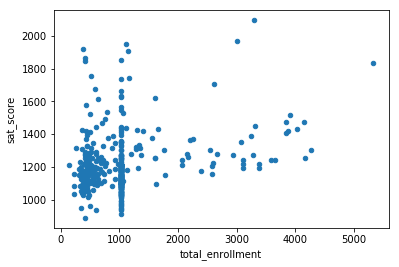

In [27]:
%matplotlib inline

full.plot.scatter(x='total_enrollment', y='sat_score')

In [28]:
full[(full["total_enrollment"] < 1000) & (full["sat_score"] < 1000)]["School Name"]

78                                       NaN
88     KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
90     INTERNATIONAL SCHOOL FOR LIBERAL ARTS
155                MULTICULTURAL HIGH SCHOOL
Name: School Name, dtype: object

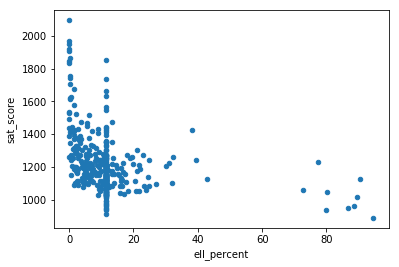

In [29]:
full.plot.scatter(x='ell_percent', y='sat_score')

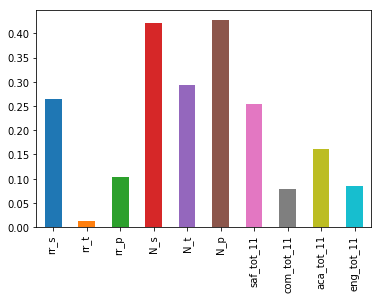

In [30]:
full.corr()["sat_score"][["rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_tot_11", "com_tot_11", "aca_tot_11", "eng_tot_11"]].plot.bar()

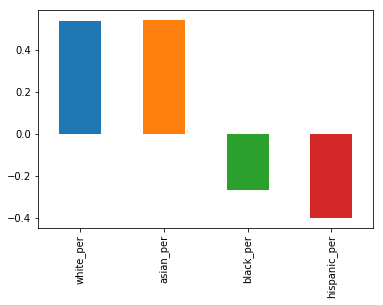

In [31]:
full.corr()["sat_score"][["white_per", "asian_per", "black_per", "hispanic_per"]].plot.bar()

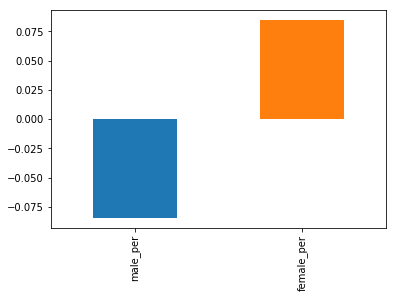

In [32]:
full.corr()["sat_score"][["male_per", "female_per"]].plot.bar()

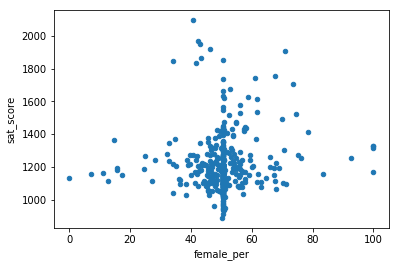

In [33]:
full.plot.scatter(x='female_per', y='sat_score')

In [34]:
full[(full["female_per"] > 65) & (full["sat_score"] > 1400)]["School Name"]

10            PROFESSIONAL PERFORMING ARTS HIGH SCH
14                    ELEANOR ROOSEVELT HIGH SCHOOL
22                     TALENT UNLIMITED HIGH SCHOOL
35             FIORELLO H. LAGUARDIA HIGH SCHOOL OF
185                     TOWNSEND HARRIS HIGH SCHOOL
212    FRANK SINATRA SCHOOL OF THE ARTS HIGH SCHOOL
Name: School Name, dtype: object

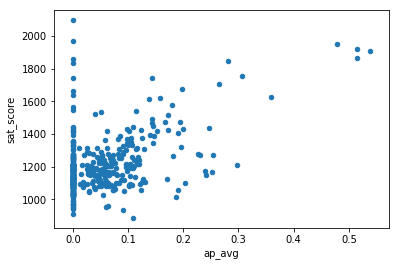

In [35]:
full["ap_avg"] = full["AP Test Takers "] / full["total_enrollment"]

full.plot.scatter(x='ap_avg', y='sat_score')

In [36]:
full[(full["ap_avg"] > .3) & (full["sat_score"] > 1700)]["School Name"]

14             ELEANOR ROOSEVELT HIGH SCHOOL
103    HIGH SCHOOL OF AMERICAN STUDIES AT LE
185              TOWNSEND HARRIS HIGH SCHOOL
202    QUEENS HIGH SCHOOL FOR THE SCIENCES A
223      STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: School Name, dtype: object